# Linear Classification and Logistic Regression on Breast Cancer Dataset

## Objective
This exercise explores the application of logistic and linear regression on the Breast Cancer dataset. The notebook will demonstrate model implementation, evaluation, visualization, and comparison, focusing on the difference in performance when using more complex data.

### Table of Contents
1. Introduction
2. Dataset Overview
3. Data Preprocessing
4. Model Implementation
5. Model Evaluation
6. Hyperparameter Tuning
7. Visualization of Results and Comparison
8. Conclusion and Discussion

### Linear Classification and Logistic Regression on Breast Cancer Dataset
In this notebook, we will explore logistic regression and linear regression on the Breast Cancer dataset. The goal is to compare the performance of both models and analyze their decision boundaries on a more complex dataset.

We will:
- Load and preprocess the Breast Cancer dataset.
- Implement logistic and linear regression models.
- Evaluate and compare their performance using multiple metrics.
- Visualize the decision boundaries.

target
1    357
0    212
Name: count, dtype: int64


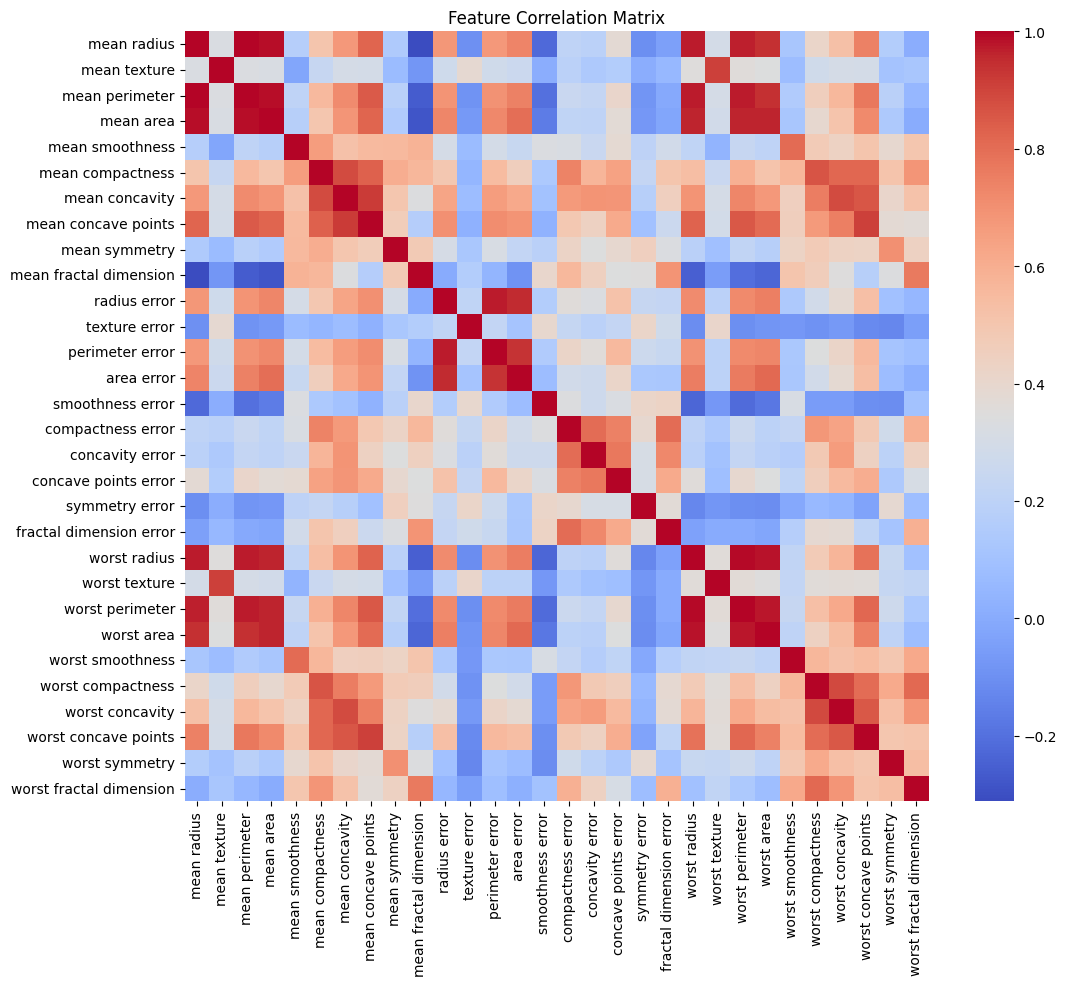

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display the first few rows
X.head()

print(y.value_counts())

# Show feature correlation (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [2]:
# Select a subset of less relevant features for demonstration
less_relevant_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness']

X_selected = X[less_relevant_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)


In [3]:
# Select a subset of less relevant features for demonstration
less_relevant_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness']

X_selected = X[less_relevant_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)


In [4]:
# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train)

LinearRegression()

In [5]:

# Generate predictions
y_pred_logistic = logistic_model.predict(X_test_pca)
y_prob_logistic = logistic_model.predict_proba(X_test_pca)[:, 1]

y_pred_linear = linear_model.predict(X_test_pca)
y_pred_linear_binary = (y_pred_linear >= 0.5).astype(int)

# Logistic Regression Metrics
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1 Score": f1_score(y_test, y_pred_logistic),
    "AUC Score": roc_auc_score(y_test, y_prob_logistic)
}

# Linear Regression (Thresholded) Metrics
linear_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_linear_binary),
    "Precision": precision_score(y_test, y_pred_linear_binary),
    "Recall": recall_score(y_test, y_pred_linear_binary),
    "F1 Score": f1_score(y_test, y_pred_linear_binary),
    "AUC Score": roc_auc_score(y_test, y_pred_linear)
}

# Display comparison
print("Logistic Regression Metrics:")
for metric, value in logistic_metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nLinear Regression (Thresholded) Metrics:")
for metric, value in linear_metrics.items():
    print(f"{metric}: {value:.2f}")


Logistic Regression Metrics:
Accuracy: 0.90
Precision: 0.89
Recall: 0.96
F1 Score: 0.93
AUC Score: 0.98

Linear Regression (Thresholded) Metrics:
Accuracy: 0.89
Precision: 0.87
Recall: 0.97
F1 Score: 0.92
AUC Score: 0.98


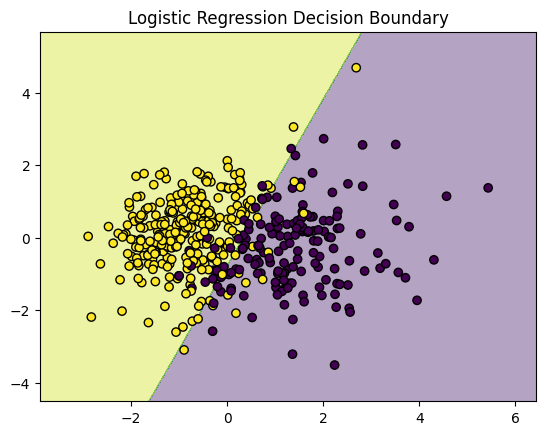

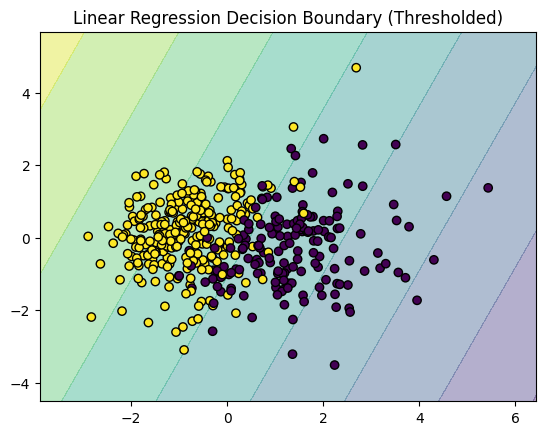

In [6]:
# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(logistic_model, X_train_pca, y_train, "Logistic Regression Decision Boundary")
plot_decision_boundary(linear_model, X_train_pca, y_train, "Linear Regression Decision Boundary (Thresholded)")


### Summary
- **Logistic Regression:** Provides a well-defined decision boundary and robust performance metrics, even with a more complex dataset. Logistic regression effectively handles binary classification, regardless of feature relevance.
- **Linear Regression:** Struggles with classification tasks on complex datasets, as demonstrated by its weaker decision boundary and poorer performance metrics.

### For Submission Before Dismissal
1. **Model Behavior:**
   - How do the decision boundaries differ between logistic regression and linear regression when applied to high-dimensional data?
   - Why does logistic regression handle class imbalance better than linear regression?

2. **Feature Importance:**
   - How can feature importance be determined for logistic regression? Which features contribute most to the classification decision?
   - How does the presence of irrelevant or highly correlated features impact both models?

3. **Scalability:**
   - How would these models perform on a significantly larger dataset with millions of samples? Consider time complexity and scalability.
   - What strategies could be employed to optimize logistic regression for large-scale data?

4. **Robustness:**
   - What happens if the dataset contains significant noise or outliers? How do these models respond?
   - How would logistic and linear regression handle missing data or incomplete features?

5. **Interpretability:**
   - How does the interpretability of logistic regression compare to that of linear regression?
   - What are the trade-offs between model interpretability and predictive power when dealing with complex datasets?

6. **Metrics:**
   - **Accuracy:**
     - How does the accuracy of logistic regression compare to linear regression on this dataset, and what does this reveal about each model's overall performance?
   - **Precision and Recall:**
     - Compare the precision and recall scores for logistic regression and linear regression. What do these metrics indicate about each model's ability to correctly identify positive cases and avoid false positives?
   - **F1 Score:**
     - How do the F1 scores of the two models compare, and what does the F1 score tell us about the balance between precision and recall for each model?
   - **AUC Score:**
     - How does the AUC score of logistic regression compare to that of linear regression, and what does the AUC score reveal about each model's ability to discriminate between classes?
   - **Confusion Matrix:**
     - What insights can be drawn from the confusion matrix for both models, and how does it help identify the models' strengths and weaknesses in terms of true positives, false positives, true negatives, and false negatives?
